# Fundamentals of Machine Learning 
                                  

In [1]:
# importing all the modules required
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

 1 .Obtain the hypothesis space search by Find-S for the given training examples. 

In [2]:
#1.	Obtain the hypothesis space search by Find-S for the given training examples.
sky=['sunny','sunny','rainy','sunny']
airtemp=['warm','warm','cold','warm']
hum=['normal','high','high','high']
wind=['strong','strong','strong','strong']
water=['warm','warm','warm','cool']
fc=['same','same','change','change']
esport=['yes','yes','no','yes']

In [3]:
data={"Sky":sky,"Airtemp":airtemp,'Humidity':hum,'Wind':wind,'Water':water,'Forecast':fc,'Enjoysport':esport}

In [4]:
df=pd.DataFrame(data)

In [5]:
df.to_csv('sport.csv')

In [6]:
#initial value of hypothesis
h=['0']*6
for instance in df.values:
    if instance[-1]=='yes':
        for j in range(len(h)):
            if (h[j]=='0' or h[j]==instance[j]):
                h[j]=instance[j]
            elif h[j]!=instance[j]:
                h[j]='?'
print("the maximally hypothesis  is:",h)

the maximally hypothesis  is: ['sunny', 'warm', '?', 'strong', '?', '?']


2.Apply Candidate Elimination Algorithm for the given training examples to obtain a hypothesis space. 

In [7]:
import csv
with open('sport.csv')  as csvFile:
        examples = [tuple(line[1:]) for line in csv.reader(csvFile)]
df=examples[1:]

In [8]:
df

[('sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'),
 ('sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'),
 ('rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no'),
 ('sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes')]

In [9]:

def g_0(n):
    return ("?",)*n

def s_0(n):
    return ('0',)*n



In [10]:
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)
        

In [11]:
def fulfills(df, hypothesis):
    ### the implementation is the same as for hypotheses:
    return more_general(hypothesis, df)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0' else x[i]
    return [tuple(h_new)]

In [12]:
def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results

In [13]:
def get_domains(df):
    d = [set() for i in df[0]]
    for x in df:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]

In [14]:
def generalize_S(x, G, S):
    S_prev = set(S)
    for s in S_prev:
        if s not in S:
            continue
        if not fulfills(x, s):
            S.remove(s)
            Splus = min_generalizations(s, x)
            ## keep only generalizations that have a counterpart in G
            S.update([h for h in Splus if any([more_general(g,h) 
                                               for g in G])])
            ## remove hypotheses less specific than any other in S
            S.difference_update([h for h in S if 
                                 any([more_general(h, h1) 
                                      for h1 in S if h != h1])])
    return S

In [15]:
def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if fulfills(x, g):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            ## keep only specializations that have a conuterpart in S
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            ## remove hypotheses less general than any other in G
            G.difference_update([h for h in G if 
                                 any([more_general(g1, h) 
                                      for g1 in G if h != g1])])
    return G

In [16]:
def candidate_elimination(df):
    domains = get_domains(df)[:-1]
    
    G = set([g_0(len(domains)-1)])
    S = set([s_0(len(domains)-1)])
    i=0
    print("\n G[{0}]:".format(i),G)
    print("\n S[{0}]:".format(i),S)
    for xcx in df:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]  # Splitting data into attributes and decisions
        if cx=='yes': # x is positive example
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else: # x is negative example
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
        print("\n G[{0}]:".format(i),G)
        print("\n S[{0}]:".format(i),S)
    return

In [17]:
candidate_elimination(df)


 G[0]: {('?', '?', '?', '?', '?')}

 S[0]: {('0', '0', '0', '0', '0')}

 G[1]: {('?', '?', '?', '?', '?')}

 S[1]: {('sunny', 'warm', 'normal', 'strong', 'warm')}

 G[2]: {('?', '?', '?', '?', '?')}

 S[2]: {('sunny', 'warm', '?', 'strong', 'warm')}

 G[3]: {('sunny', '?', '?', '?', '?'), ('?', 'warm', '?', '?', '?')}

 S[3]: {('sunny', 'warm', '?', 'strong', 'warm')}

 G[4]: {('sunny', '?', '?', '?', '?'), ('?', 'warm', '?', '?', '?')}

 S[4]: {('sunny', 'warm', '?', 'strong', '?')}


# 3. Use ID3 Algorithm to develop the decision tree support system for the following training data set.

In [81]:
df2=pd.read_csv("sport1.csv")
dataset=pd.read_csv('sport1.csv')
dataset=dataset.iloc[:,1:6]
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,-1].values
dataset


,sky,airtemp,humidity,wind,Enjoy sport
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [80]:
X

array([['sunny', 'hot', 'high', 'weak'],
       ['sunny', 'hot', 'high', 'strong'],
       ['overcast', 'hot', 'high', 'weak'],
       ['rain', 'mild', 'high', 'weak'],
       ['rain', 'cool', 'normal', 'weak'],
       ['rain', 'cool', 'normal', 'strong'],
       ['overcast', 'cool', 'normal', 'strong'],
       ['sunny', 'mild', 'high', 'weak'],
       ['sunny', 'cool', 'normal', 'weak'],
       ['rain', 'mild', 'normal', 'weak'],
       ['sunny', 'mild', 'normal', 'strong'],
       ['overcast', 'mild', 'high', 'strong'],
       ['overcast', 'hot', 'normal', 'weak'],
       ['rain', 'mild', 'high', 'strong']], dtype=object)

In [79]:
y

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [19]:
#categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,1]=labelencoder_X.fit_transform(X[:,1])
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [82]:
X[:,0]

array(['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast',
       'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain'],
      dtype=object)

In [20]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
#'sunny','cool','high','strong'

In [21]:

#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
X_test=sc.transform(X_test)

In [22]:
#Fitting Decision Tree classififcation to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

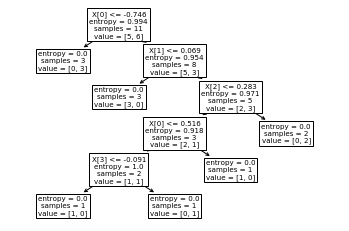

In [24]:
tree.plot_tree(classifier.fit(X_train, y_train))
plt.show()

5. Apply the naive Bayes classifier to a concept learning problem to classify days according to whether someone will 
play tennis. The table given below provides a set of 14 training examples of the target concept PlayTennis, 
where each day is described by the attributes Outlook, Temperature, Humidity, and Wind. 

In [25]:
# data 
sky=['sunny','sunny','overcast','rain','rain','rain','overcast','sunny','sunny','rain','sunny','overcast','overcast','rain']
airtemp=['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
hum=['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']
wind=['weak','strong','weak','weak','weak','strong','strong','weak','weak','weak','strong','strong','weak','strong']
esport=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [26]:
# Creating a csv file 
data={"sky":sky,'airtemp':airtemp,'humidity':hum,'wind':wind,'Enjoy sport':esport}
df1=pd.DataFrame(data)
df1.to_csv('sport1.csv')
dataset=dataset.iloc[:,1:6]
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,-1].values

Naives Bayes classification

In [85]:
#categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,0]=labelencoder_X.fit_transform(X[:,0])
X[:,1]=labelencoder_X.fit_transform(X[:,1])
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,3]=labelencoder_X.fit_transform(X[:,3])
#onehotencoder=OneHotEncoder(categorical_features=[0,1,2,3])
#X=onehotencoder.fit_transform(X).toarray()
print(X.dtype)
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)
print(y)
#if there is more than three value we can use hotencoder
#[2,0,0,0]


object
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [28]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=0)
#['sunny','cool','high','strong']

In [29]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
#X_test=[2,0,0,0]
X_test=sc.transform(X_test)
len(X_test)
X_test

array([[-1.53960072,  1.08012345,  0.9258201 ,  0.79056942]])

In [30]:
#Fitting Naives Bayes classififcation to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
#X_test=np.array([2,0,0,0])
#Predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=classifier.predict(np.array([[2,0,0,0]]))#sunny,cool,high,strong
y_pred

array([1])

6.	Develop a Decision Tree for the given data set and find the accuracy of the model.

In [31]:
# importing data 
df2=pd.read_csv("Social_Network_Ads.csv")
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values
df2.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [32]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [33]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
X_test=sc.transform(X_test)


In [34]:
#Fitting Naives Bayes classififcation to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [35]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [36]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.91

7.Develop a Naïve Bayes Classifier for the given data set and find the accuracy of the model.

In [37]:
df=pd.read_csv("Social_Network_Ads.csv")
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values

In [83]:
X

array([['sunny', 'hot', 'high', 'weak'],
       ['sunny', 'hot', 'high', 'strong'],
       ['overcast', 'hot', 'high', 'weak'],
       ['rain', 'mild', 'high', 'weak'],
       ['rain', 'cool', 'normal', 'weak'],
       ['rain', 'cool', 'normal', 'strong'],
       ['overcast', 'cool', 'normal', 'strong'],
       ['sunny', 'mild', 'high', 'weak'],
       ['sunny', 'cool', 'normal', 'weak'],
       ['rain', 'mild', 'normal', 'weak'],
       ['sunny', 'mild', 'normal', 'strong'],
       ['overcast', 'mild', 'high', 'strong'],
       ['overcast', 'hot', 'normal', 'weak'],
       ['rain', 'mild', 'high', 'strong']], dtype=object)

In [84]:
y

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [38]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [39]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#it will learn and transform
X_test=sc.transform(X_test)


In [40]:
#Fitting Naives Bayes classififcation to the training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [42]:
import sklearn
sklearn.metrics.accuracy_score(y_pred,y_test)

0.9

8.	Develop a Logistic Regression classifier for the given data set and find the accuracy of the model

In [43]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

/home/wajoud/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [45]:
import sklearn
sklearn.metrics.accuracy_score(y_pred,y_test)

0.89

9.	Develop a K-NN model for the given data set and find the accuracy of the model.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
#Predicting the test set results
y_pred=classifier.predict(X_test)


In [48]:
import sklearn
print(sklearn.metrics.accuracy_score(y_pred,y_test))
cm=sklearn.metrics.confusion_matrix(y_pred,y_test)
cm

0.93


array([[64,  3],
       [ 4, 29]])

In [49]:
#18.	Write the  Python code to calculate the following
#a.	Accuracy 
#b.	Misclassification  
#c.	Type-1 and Type-2 error rates
#d.	Sensitivity
#e.	Specificity
Accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
Misclassification=1-Accuracy
type1er=cm[0,1] #FP
type2er=cm[1,0] #FN
sensitivity=(cm[0,0])/(cm[0,0]+cm[1,0]) #recall or true positive rate
specifivity=(cm[1,1])/(cm[1,1]+cm[0,1]) #true negativity rate
print("Accuracy:",Accuracy)
print("Misclassification:",Misclassification)
print("type1 error:",type1er)
print("type2 error:",type2er)
print("sensitivity:",sensitivity)
print("specifivity:",specifivity)

Accuracy: 0.93
Misclassification: 0.06999999999999995
type1 error: 3
type2 error: 4
sensitivity: 0.9411764705882353
specifivity: 0.90625


10.	Develop a linear regression for the given data set and find the accuracy of the model.

In [50]:
X=df2.iloc[:,[2,3]].values
y=df2.iloc[:,4].values

In [51]:
#splitting the dataset into the training set and test set
#model_selection=cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# #rom sklearn.decomposition import PCA as p
# pc=p(n_components=1)
# X_train=pc.fit_transform(X_train)
# X_test=pc.transform(X_test)
# #X_train

In [54]:
#Predicting the test set results
y_pred=classifier.predict(X_test)

In [77]:
import sklearn
sklearn.metrics.accuracy_score(y_pred,y_test)

0.94

12.Develop a random forest for the given data set and find the accuracy of the model.

In [56]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

/home/wajoud/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_pred=classifier.predict(X_test)

In [58]:
sklearn.metrics.accuracy_score(y_pred,y_test)

0.94

14.	Write the Python code to compute entropy and information gain

In [59]:
df=pd.read_csv("sport1.csv")

In [60]:
df=df.iloc[:,1:]

In [61]:
c=0
y=0
n=0
for i in df.values:
    c=c+1
    if i[-1]=='yes':
        y=y+1
    else:
        n=n+1
tot_wt=-((y/c)*(np.log10(y/c)/np.log10(2))+(n/c)*(np.log10(n/c)/np.log10(2)))

In [62]:
p=len(df)
tot_wt

0.9402859586706309

In [63]:

def entropy(s):
    c=0
    y=0
    n=0
    for i in s.values:
        c=c+1
        if i[-1]=='yes':
            y=y+1
        else:
            n=n+1
        #print("tot",c)
        #print("yes",y)
        if n==0:
            j=0
        else:
            j=(n/c)*(np.log10(n/c)/np.log10(2))
        if y==0:
            k=0
        else:
            k=(y/c)*(np.log10(y/c)/np.log10(2))
    return -(j+k)

In [64]:
def information_gain(s,colname):
    g=0
    for i in np.unique(df[colname].values):
        l=len(s[s[colname]==i])
        g=g+(l/p)*entropy(s[s[colname]==i])
    return tot_wt-g
        
        
    

In [65]:
for i in df.columns[:-1]:
    print(information_gain(df,i))


0.2467498197744391
0.029222565658954647
0.15183550136234147
0.04812703040826927


15.Write the  Python code todemonstrate conditional probability 

In [66]:
def prob(l,a,k):
    n=len(df[df[l]==a][df['Enjoy sport']==k])
    k=len(df[df[l]==a])
    return n/k

In [67]:
def naive_bayes(s,c,h,m):
    yc=len(df[df['Enjoy sport']=='yes'])
    nc=len(df[df['Enjoy sport']=='no'])
    n=len(df)
    i,j,k,l=df.columns[:-1]
    vsb=(yc/n)*prob(i,s,'yes')*prob(j,c,'yes')*prob(k,h,'yes')*prob(l,m,'yes')
    vnb=(yc/n)*prob(i,s,'no')*prob(j,c,'no')*prob(k,h,'no')*prob(l,m,'no')
    print(vsb)
    print(vnb)
    if vsb>vnb:
        print(vsb)
        print("is going to play")
    else:
        print(vnb)
        print("not going")
naive_bayes('sunny','cool','high','strong')
    

0.0413265306122449
0.027551020408163266
0.0413265306122449
is going to play


/home/wajoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


16.Write the  Python code to compute Euclidean Distance between data points

In [68]:
def euclidean_dist(x1,x2,y1,y2):
    dist=np.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

In [69]:
euclidean_dist(3,6,8,3)

5.830951894845301

17.Write the  Python code to calculate covariance matrix, Eigen values and Eigen vectors 


In [70]:
A = np.array([[9,2,3],[2,3,4],[9,5,2]])
w,v = np.linalg.eig(A)
print('eigen vector',v)
print('eigen value',w)

eigen vector [[-0.63566346 -0.4386726  -0.11958179]
 [-0.381541    0.85683887 -0.54787598]
 [-0.6710875   0.27091236  0.82796867]]
eigen value [13.36763265  3.24077366 -2.60840631]


In [71]:
np.cov(A)

array([[14.33333333, -3.        , 11.16666667],
       [-3.        ,  1.        , -3.5       ],
       [11.16666667, -3.5       , 12.33333333]])

In [72]:
A=np.array([1,5,4,7,9,6])
B=np.array([2,9,7,4,1,6])
a=A.mean()
b=B.mean()
covAB=np.sum((A-a)*(B-b))
covBA=covAB
covAA=np.sum((A-a)**2)
covBB=np.sum((B-b)**2)

In [73]:
np.array([[covAA,covAB],[covBA,covBB]])


array([[37.33333333, -6.66666667],
       [-6.66666667, 46.83333333]])

In [74]:
#apply PAC for the given data set 
df3=pd.read_csv("sport1.csv")
df3=df3.iloc[:,1:]
n=[]
for i in range(len(df3.columns)-1):
    k=df3.iloc[:,i].unique()
    n.append(len(k)+2)#y +2    
print(n)
Hs=np.prod(n)
Hs

[5, 5, 4, 4]


400

In [75]:
def num_train_eg(hs,D,E):
    m=(1/E)*(np.log10(hs)/np.log10(2)+np.log10(1/D)/np.log10(2))
    return m
print("Number of training examples required is : ",num_train_eg(Hs,0.05,0.05))
#E-true error D-traing error

Number of training examples required is :  259.3156856932418


In [76]:
#agnestic
def train_req(hs,D,E):
    m=(1/(2*(E**2)))*(np.log10(hs)/np.log10(2)+np.log10(1/D)/np.log10(2))
    return m
print("Number of training examples required is : ",num_train_eg(Hs,0.05,0.05))

Number of training examples required is :  259.3156856932418
